In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
import pywt

In [63]:
coeffs_ref = pywt.wavedec2(np.zeros((3,42)), 'haar')

print 0, coeffs_ref[0].shape
for i in range(1,len(coeffs_ref)):
    print i, coeffs_ref[i][0].shape, coeffs_ref[i][1].shape, coeffs_ref[i][2].shape


0 (2, 21)
1 (2, 21) (2, 21) (2, 21)


In [51]:
data = mnist.train.images[1].reshape(28,28)

'''data = np.append(np.zeros((10,28)), data, axis = 0)
data = np.append(data, np.zeros((10,28)), axis = 0)
data = np.append(np.zeros((48,10)), data, axis = 1)
data = np.append(data, np.zeros((48,10)), axis = 1)'''

data = np.append(np.zeros((2,28)), data, axis = 0)
data = np.append(data, np.zeros((2,28)), axis = 0)
data = np.append(np.zeros((32,2)), data, axis = 1)
data = np.append(data, np.zeros((32,2)), axis = 1)


coeffs_ref = pywt.wavedec2(data, 'haar')

print 0, coeffs_ref[0].shape
for i in range(1,len(coeffs_ref)):
    print i, coeffs_ref[i][0].shape, coeffs_ref[i][1].shape, coeffs_ref[i][2].shape

print coeffs_ref[0]

print coeffs_ref[1]

0 (1, 1)
1 (1, 1) (1, 1) (1, 1)
2 (2, 2) (2, 2) (2, 2)
3 (4, 4) (4, 4) (4, 4)
4 (8, 8) (8, 8) (8, 8)
5 (16, 16) (16, 16) (16, 16)
[[ 3.7161767]]
(array([[-0.06789216]]), array([[-0.59926475]]), array([[-1.02401967]]))


In [44]:
import math
int(math.ceil(33./2))

17

In [56]:
test = np.append(coeffs_ref[1][0], coeffs_ref[1][1])
test = np.append(test, coeffs_ref[1][2])
print test

[-0.06789216 -0.59926475 -1.02401967]


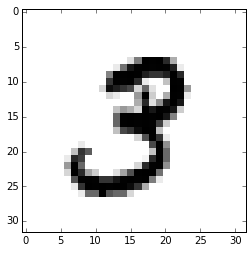

In [8]:
plt.imshow(data, interpolation='nearest', cmap = 'gray_r')

In [9]:
def init_coeffs_mnist(MNIST_SHAPE = [(1, 1), (2, 2), (4, 4), (8, 8), (16, 16)]):
    coeffs_zero = [np.zeros((2, 2))]
    for h in range(1,6):
        coeffs_zero += [[]]   
        s = MNIST_SHAPE[h-1]
        for k in range(3) :
            coeffs_zero[h] += [np.zeros(s)]        
    return coeffs_zero    

In [10]:
def init_coeffs_mnist_pos(coeffs_ref, MNIST_SHAPE = [(1, 1), (2, 2), (4, 4), (8, 8), (16, 16)]):
    coeffs_pos = init_coeffs_mnist()
    coeffs_pos[0] = coeffs_ref[0]
    coeffs_pos[1] = coeffs_ref[1]
    for h in range(2,6):
        s = MNIST_SHAPE[h-1][0]
        for k in range(3) :
            print s, (s - 1) / 2
            coeffs_pos[h][k][(s - 1) / 2][(s - 1) / 2] = coeffs_ref[h][k][(s - 1) / 2][(s - 1) / 2]       
            coeffs_pos[h][k][(s - 1) / 2][(s - 1) / 2 + 1] = coeffs_ref[h][k][(s - 1) / 2][(s - 1) / 2 + 1]       
            coeffs_pos[h][k][(s - 1) / 2 + 1][(s - 1) / 2] = coeffs_ref[h][k][(s - 1) / 2 + 1][(s - 1) / 2]       
            coeffs_pos[h][k][(s - 1) / 2 + 1][(s - 1) / 2 + 1] = coeffs_ref[h][k][(s - 1) / 2 + 1][(s - 1) / 2 + 1]       
    return coeffs_pos    

In [11]:
coeffs_zero = init_coeffs_mnist()

2 0
2 0
2 0
4 1
4 1
4 1
8 3
8 3
8 3
16 7
16 7
16 7


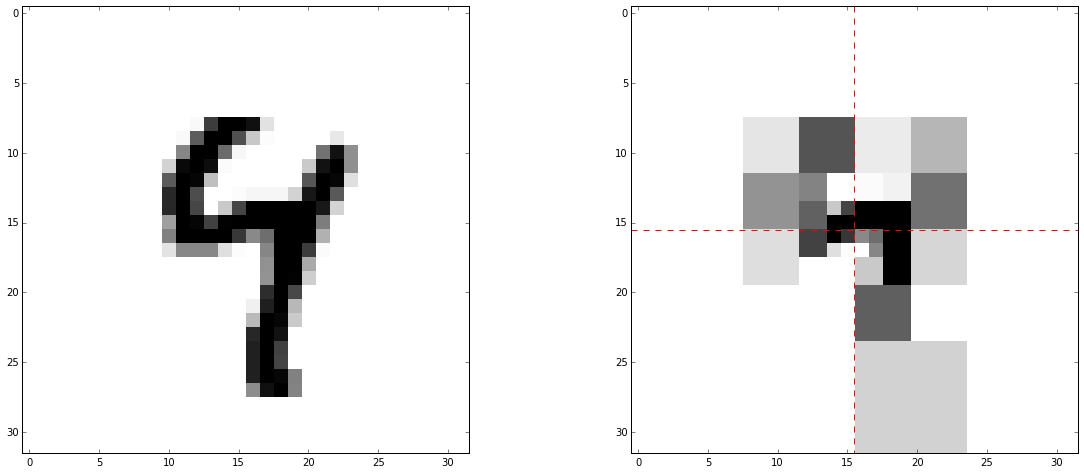

In [12]:
data = mnist.train.images[2].reshape(28,28)

data = np.append(np.zeros((2,28)), data, axis = 0)
data = np.append(data, np.zeros((2,28)), axis = 0)
data = np.append(np.zeros((32,2)), data, axis = 1)
data = np.append(data, np.zeros((32,2)), axis = 1)
coeffs_ref = pywt.wavedec2(data, 'haar')

coeffs_pos = init_coeffs_mnist_pos(coeffs_ref)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(data, interpolation='nearest', cmap='gray_r')
plt.subplot(1,2,2)
plt.imshow(pywt.waverec2(coeffs_pos, 'haar'), interpolation='nearest', cmap='gray_r')
plt.plot([-0.5, 31.5],[15.5, 15.5],'r--')
plt.plot([15.5, 15.5],[-0.5, 31.5],'r--')
plt.xlim([-0.5, 31.5])
plt.ylim([-0.5, 31.5])
plt.gca().invert_yaxis()

In [13]:
for h in  range(1,6):
    indices_0 = np.nonzero(coeffs_pos[h][0])
    indices_1 = np.nonzero(coeffs_pos[h][1])
    indices_2 = np.nonzero(coeffs_pos[h][2])
    print coeffs_pos[h][0][indices_0], coeffs_pos[h][1][indices_1], coeffs_pos[h][2][indices_2]

[ 0.25159314] [-0.75306378] [ 0.95943633]
[-1.64338244 -1.43700989  0.43235297  0.71691181] [-1.64338244  1.43700989 -0.43235297  2.14485307] [ 1.64338244 -1.43700989 -0.43235297  0.71691181]
[-0.21323531 -1.41029419  0.86470594  0.36960787] [-1.20931377 -0.49264709 -0.34705885  2.20980406] [-1.05049027 -0.33186277 -0.34705885 -0.28235296]
[-0.85882357 -1.92254914  1.21176479  0.16568628] [ 0.36078432 -0.03431373  0.25490197 -1.40098047] [ 0.59803925 -0.03431373  0.25490197  0.16176471]
[-0.52156867  0.81960791  0.27843139] [-0.2627451   0.16470588 -0.29019609] [-0.25490196  0.05098038  0.18431374]


Idée : à chaque image (magnifiée au centre) est associé un double problème de classification : 
 * position de l'oeil dans l'image : P(u)
 * classe de l'objet : P(c)
 
Pour chaque image observée: 
 1. determiner u
 1. determiner P(c|u)
 1. choisir c
 1. determiner u_next = argmax_u' P(c|u')
 1. commande Delta_u = u'-u


In [14]:
np.shape(coeffs[2])

NameError: name 'coeffs' is not defined

In [ ]:
np.shape(coeffs[5])